# 문제 1
- 기타 레슨
- https://www.acmicpc.net/problem/2343

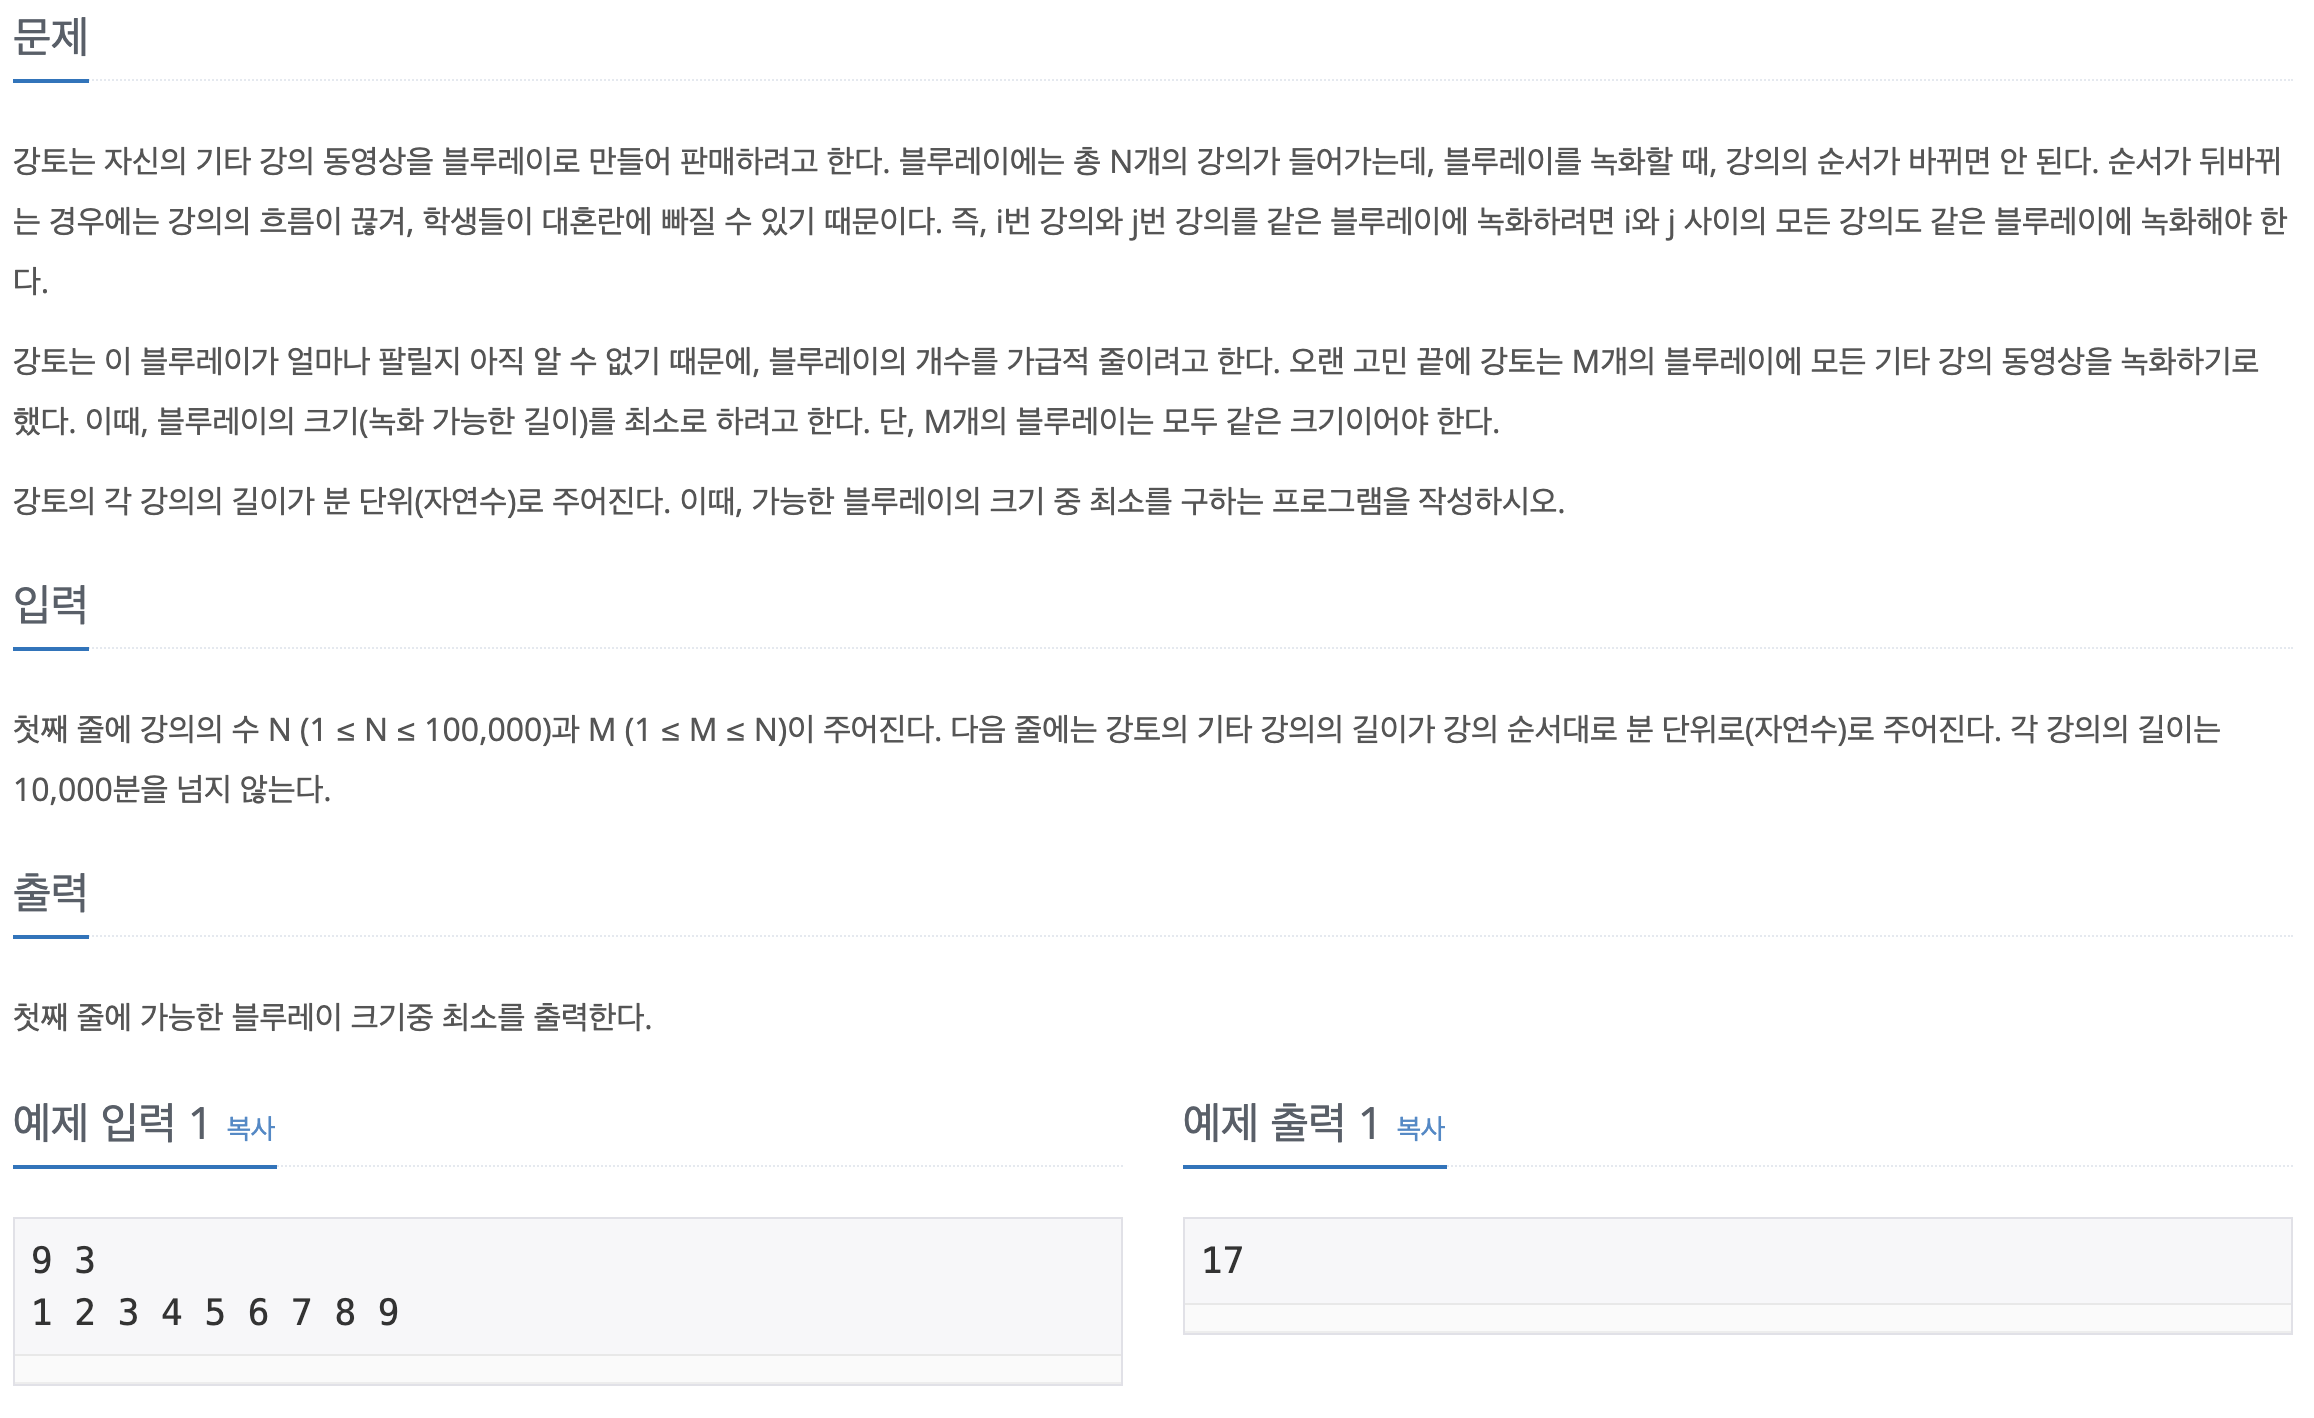

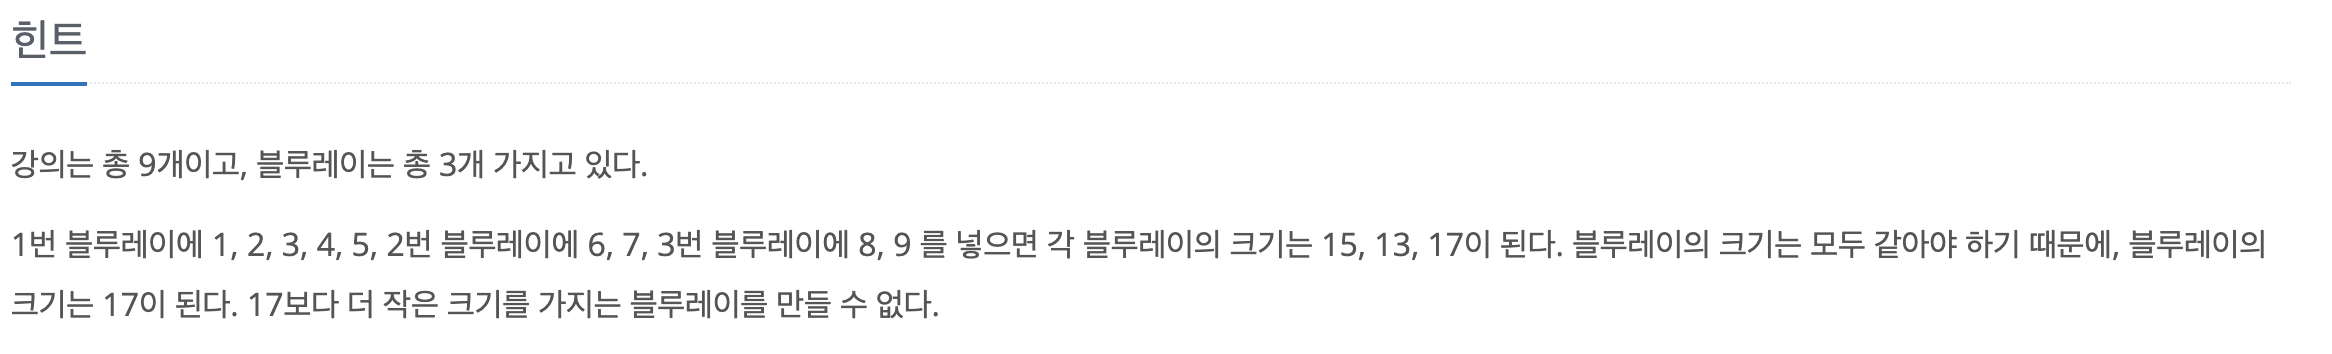

## Step
- 앞에서 부터 쪼갤 수 있는 경우의 수는 다 쪼개 보기
    - 주어진 예시를 활용하면, 1,1,7개 1,2,6개 ... 등등
    - 쪼갠 리스트의 최대합을 저장하면서 최소값을 찾아가는 방법

### 시간초과 발생
- 아마 이중 for문을 이용하여 모든 쪼갤 수 있는 경우의 수를 구하다보니..?


In [29]:
import sys
N,M = map(int, input().split())
l = list(map(int, input().split()))
# l = list(map(int, sys.stdin.readline().split()))

ans = 0
for i in range(1, N-2):
    for j in range(i+1, N-1):
        #print(l[:i], l[i:j], l[j:])
        
        if ans == 0:
            ans = max(sum(l[:i]),sum(l[i:j]),sum(l[j:]))
            #print(ans)
        else:
            ans = min(ans, max(sum(l[:i]),sum(l[i:j]),sum(l[j:])))
            #print(ans)
print(ans)

9 3
1 2 3 4 5 6 7 8 9
17


### 이분 탐색 이용 코드
- 블루레이의 최대값 : 전체 리스트의 합 (N개의 강의)
- 블루레이의 최소값 : 전체 리스트중 가장 큰 값 (1개의 강의)

In [ ]:
n, m = map(int, input().split())
data = list(map(int, input().split()))
left, right = max(data), sum(data)

while left <= right:
    mid = (left + right) // 2
    cnt = 0
    temp = 0
    for i in range(n):
        if temp + data[i] > mid: # 블루레이에 하나씩 담아가면서, mid값을 초과하면,
            cnt += 1             # 블루레이를 하나 추가하고, 그 블루레이에 추가해야하므로 temp값 초기화
            temp = 0
        temp += data[i]

    cnt += 1 if temp else 0      # 만약 가장 마지막 블루레이에 하나라도 담겨있으면, 블루레이 개수 추가 그렇지 않다면 추가 x

    if cnt <= m:                 # 블루레이 개수가 모자르다면, 블루레이의 개수를 늘려야 하기 때문에 max값을 반으로 줄여가며 이분 탐색
        right = mid - 1
    else:                        # 충분하거나 더 많다면, 블루레이의 개수를 줄여야 하기 때문에 min값을 늘려가며 이분탐색
        left = mid + 1

print(left)

# 문제 2
- 공유기 설치
- https://www.acmicpc.net/problem/2110

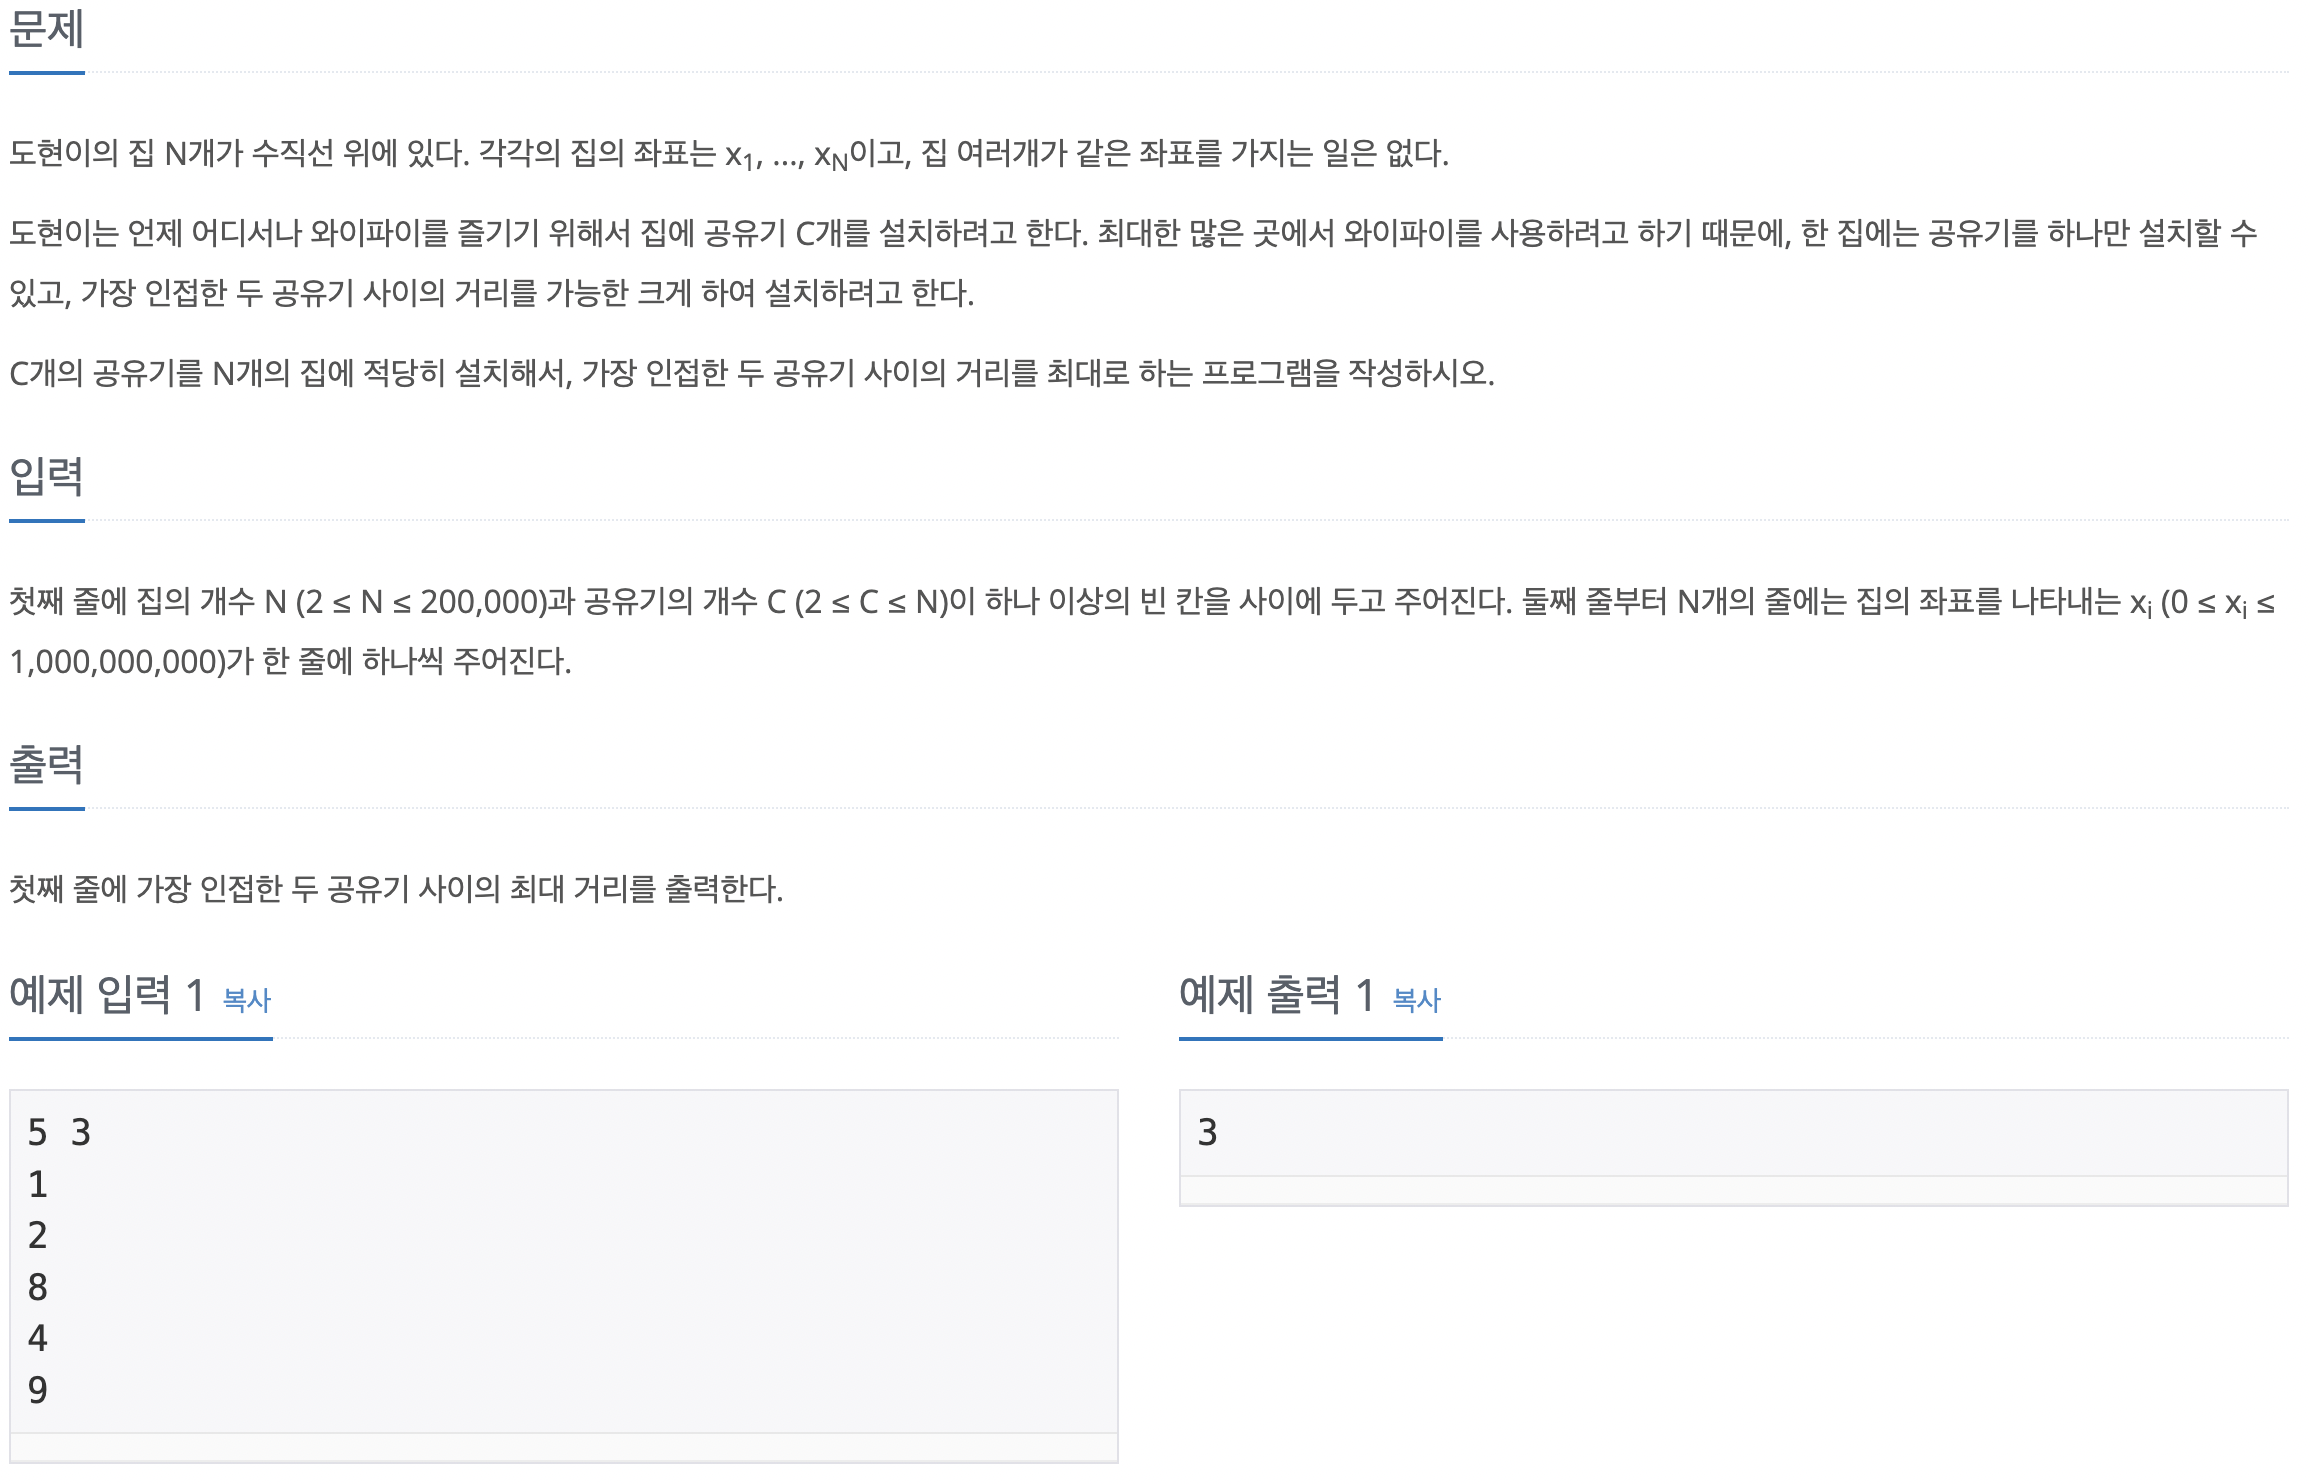

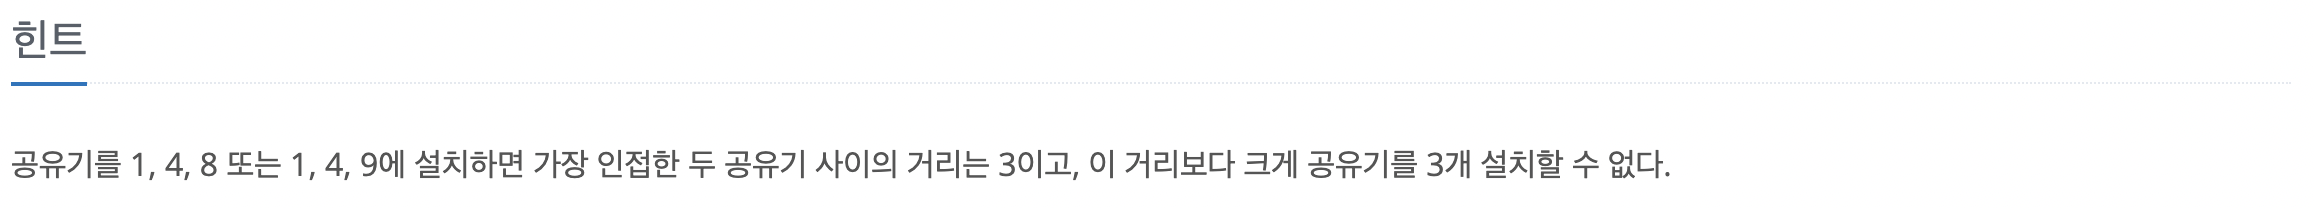

## Step
- 첫 집과 마지막 집은 무조건 설치를 한다?
    - 우선 이것은 확정이라고 생각
    
- 가장 짧은 거리 = 1
- 가장 긴 거리 = 첫집 - 마지막집
- 중간 값 = (가장 짧은 거리 + 가장 긴 거리) // 2
- 간격을 중간 값으로 설정하여 설치를 진행


#### 1. 만약 총 설치한 개수가 정해진 개수보다 많다!
    - 간격이 좁았다는 얘기이므로, 간격을 늘린다
        
#### 2. 만약 총 설치한 개수가 정해진 개수와 같다!
    - 현재 간격을 저장해놓고, 더 넓은 간격으로 설치 할 수 있는지 확인을 해본다

#### 3. 만약 총 설치한 개수가 정해진 개수보다 적다!
    - 간격이 넓었다는 얘기이므로, 간격을 좁힌다
    

In [42]:
import sys

N, C = map(int,input().split())
house = []
for _ in range(N):
    house.append(int(sys.stdin.readline()))
    #house.append(int(input()))

house.sort()

start = 1
end = house[-1] - house[0]
ans = 0

while start <= end:
    mid = (start + end) // 2
    check = house[0]
    cnt = 1
    
    for i in range(1,N):
        if house[i] >= check + mid:
            cnt += 1
            check = house[i]
    
    if cnt >= C:
        start = mid + 1
        ans = mid
        
    else:
        end = mid - 1

print(ans)

5 3
1
2
4
8
9
3


- 참고한 코드

In [39]:
n, c = map(int, input().split())

array = []
for i in range(n):
    array.append(int(input()))

array.sort()


def binary_search(array, start, end):
    while start <= end:
        print('start 와 end :', start, end)
        mid = (start + end) // 2
        print('mid :', mid)
        current = array[0]
        count = 1

        for i in range(1, len(array)):
            if array[i] >= current + mid:
                print('i와 array[i] :',i,array[i])
                count += 1
                current = array[i]
        print('count :', count)
        print('--------------')
        if count >= c:
            global answer
            start = mid + 1
            answer = mid
        else:
            end = mid - 1


start = 1
end = array[-1] - array[0]
answer = 0

binary_search(array, start, end)
print(answer)

5 3
1
2
4
8
9
start 와 end : 1 8
mid : 4
i와 array[i] : 3 8
count : 2
--------------
start 와 end : 1 3
mid : 2
i와 array[i] : 2 4
i와 array[i] : 3 8
count : 3
--------------
start 와 end : 3 3
mid : 3
i와 array[i] : 2 4
i와 array[i] : 3 8
count : 3
--------------
3


# 문제 3
- 부분수열의 합 2
- https://www.acmicpc.net/problem/1208

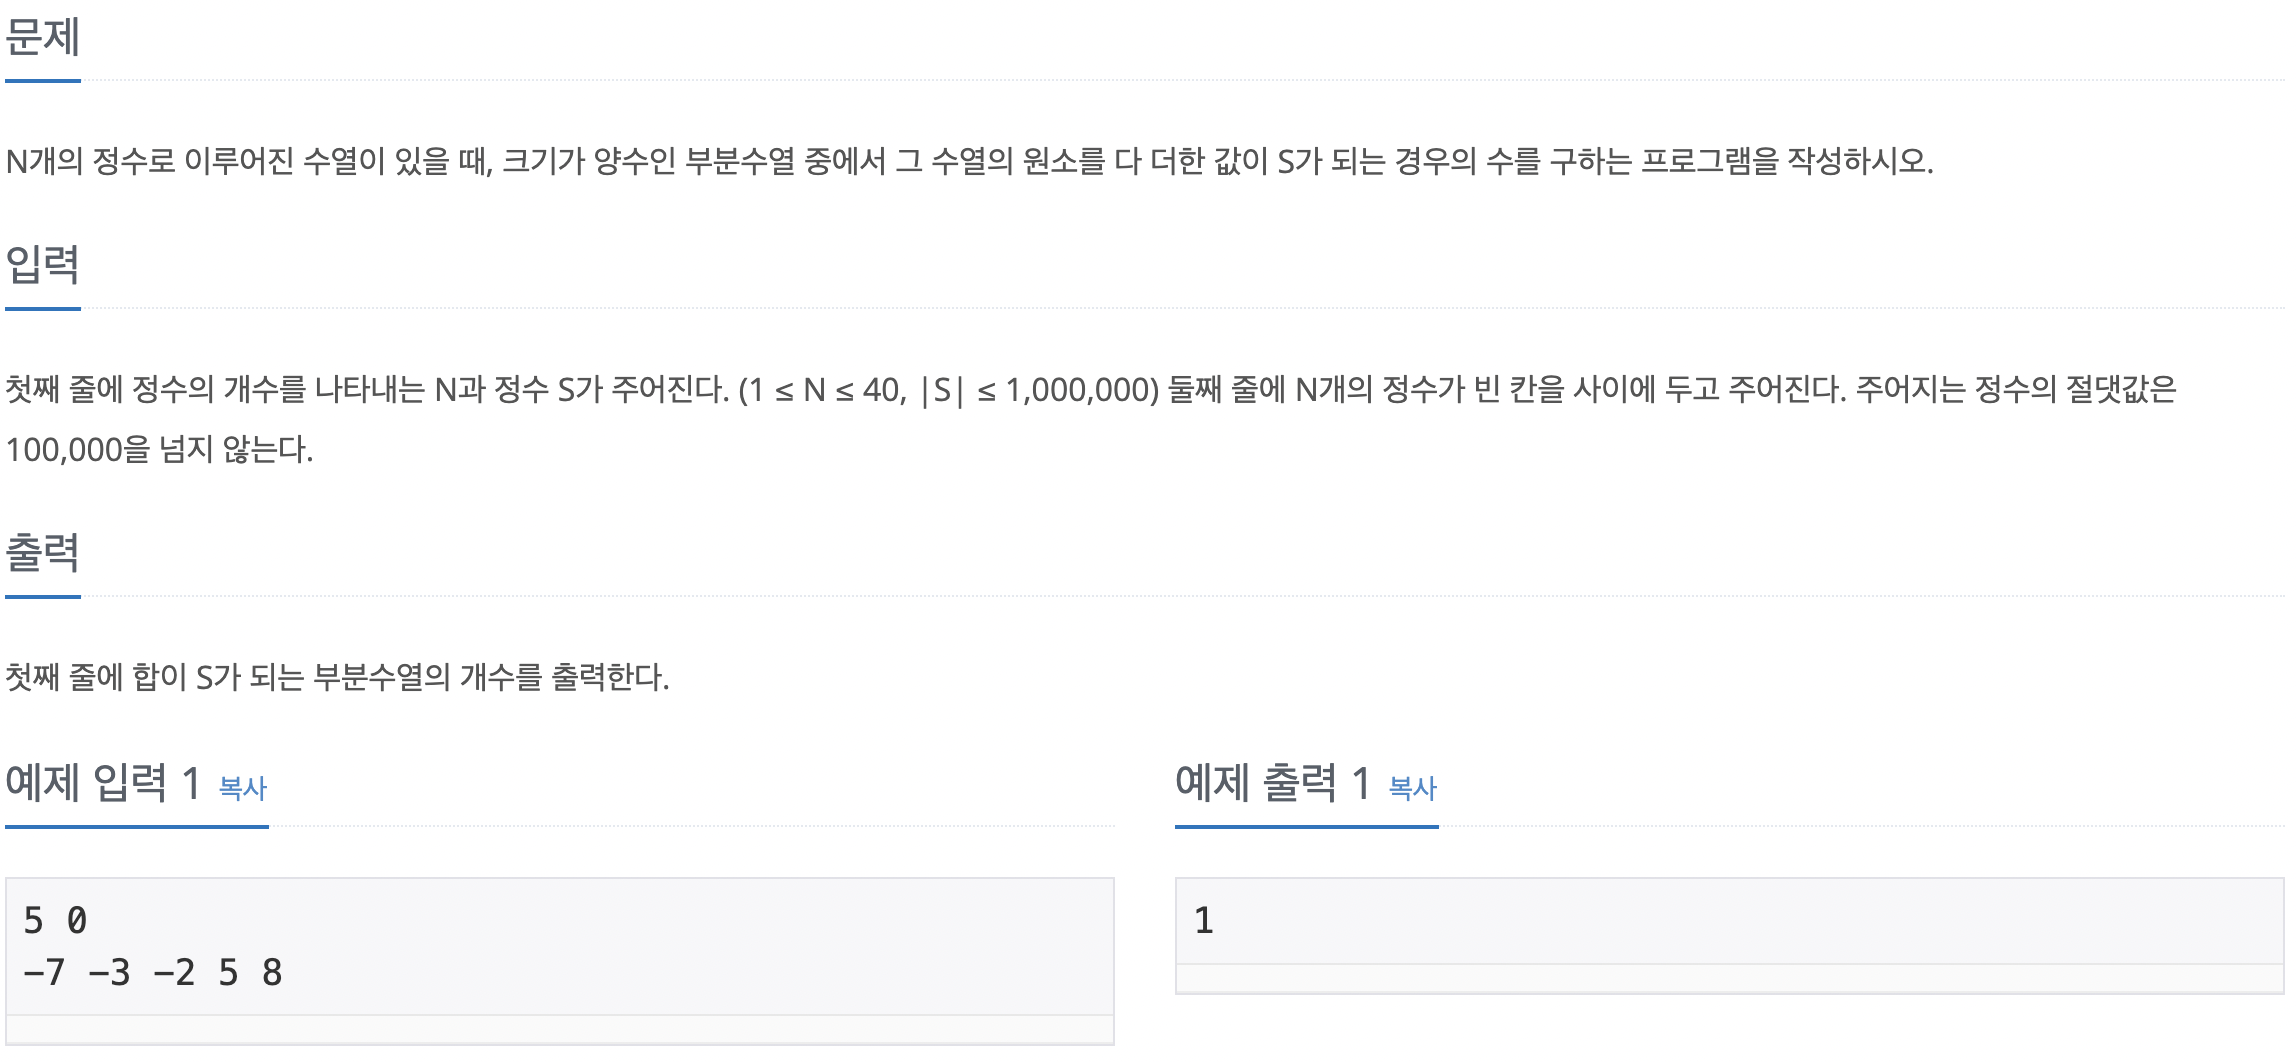

### 도저히 모르겠던 문제
- ```"부분수열의 합"``` 문제는 combination을 활용해서 풀이 가능, ```"부분수열의 합 2"``` 문제는 범위가 훨씬 크고, 시간이 짧기에 불가능

- 코드 풀이 보며 공부하기로
- https://hyunse0.tistory.com/333

In [44]:
from itertools import combinations
from collections import defaultdict   # 자료형을 지정할 수 있어 예외처리를 신경 써주지 않아도 된다고 함

N, S = map(int, input().split())
numbers = list(map(int, input().split()))
mid = N//2

# 두개로 나누기(좌측, 우측)
left = numbers[:mid]
right = numbers[mid:]

left_sum = defaultdict(int)
right_sum = defaultdict(int)

# 좌측, 우측의 부분수열에서 나올 수 있는 합 구하기
for i in range(len(left) + 1):
    for combo1 in combinations(left, i):
        left_sum[sum(combo1)] += 1
        
for j in range(len(right) + 1):
    for combo2 in combinations(right, j):
        right_sum[sum(combo2)] += 1

# 부분수열에서 나올 수 있는 합을 크기 순으로 정렬하기
left_sum_num = sorted(left_sum.keys())
right_sum_num = sorted(right_sum.keys())

l_pointer = 0
r_pointer = len(right_sum_num) - 1

cnt = 0
while l_pointer < len(left_sum_num) and r_pointer >= 0:
    temp = left_sum_num[l_pointer] + right_sum_num[r_pointer]
    
    if temp == S:  # 구하려는 합과 딱 맞으면, 나올 수 있는 경우의 수를 모두 더해주고, 포인터를 진행 방향대로 흘려주기
        cnt += left_sum[left_sum_num[l_pointer]] * right_sum[right_sum_num[r_pointer]] # 모든 경우의수 곱 연산
        l_pointer += 1 
        r_pointer -= 1 
        
    elif temp > S: # 구하려는 합보다 크면, 한 쪽 부분수열에서 나올 수 있는 합을 하나씩 줄여가며 비교
        r_pointer -= 1
        
    else: l_pointer += 1 # 구하려는 합보다 작으면, 한 쪽 부분수열에서 나올 수 있는 합을 하나씩 키워가며 비교
        
# 공집합 + 공집합인 경우 빼주기 
if S == 0:
    cnt -= 1

print(cnt)

5 0
-7 -3 -2 5 8
1


- {0}, {-2,2}, {-2,0,2}
- 세 가지 부분수열이 있다

#### 변수들에 어떤식으로 할당이 되는지 확인

In [50]:
left, right

([-7, -3], [-2, 5, 8])

In [48]:
left_sum

defaultdict(int, {0: 1, -7: 1, -3: 1, -10: 1})

In [49]:
right_sum

defaultdict(int, {0: 1, -2: 1, 5: 1, 8: 1, 3: 1, 6: 1, 13: 1, 11: 1})

In [46]:
left_sum_num

[-10, -7, -3, 0]

In [47]:
right_sum_num

[-2, 0, 3, 5, 6, 8, 11, 13]